In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f282b465f375>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


Beta: 1.1045137961171985
Expected Return using CAPM: 25.24%


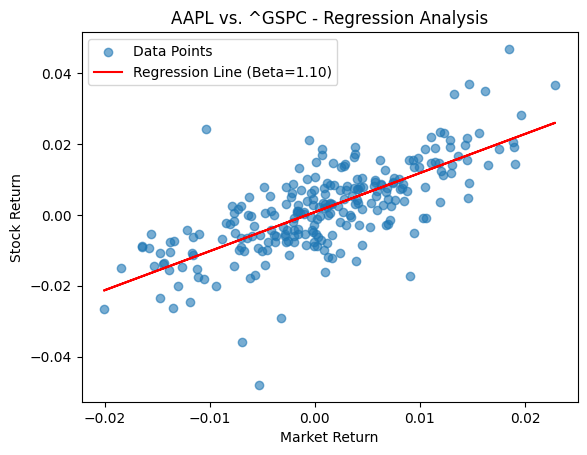

[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
[*********************100%***********************]  1 of 1 completed


High-Beta Stocks:
AAPL Beta: 1.1045137961171985



<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


TSLA Beta: 2.2192968627465923
GOOGL Beta: 1.3870634128763462

Low-Beta Stocks:


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


KO Beta: 0.38050989258990886


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


PG Beta: 0.38161440684710185


[*********************100%***********************]  1 of 1 completed

JNJ Beta: 0.34225018569594357



<ipython-input-2-f282b465f375>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


In [ ]:
# Step 1: Download historical data for S&P 500 and a stock (e.g., Apple, Tesla)
ticker_stock = 'AAPL'  # Example: Apple Inc.
ticker_market = '^GSPC'  # S&P 500 index

# Download historical data (adjust for dividends and splits)
stock_data = yf.download(ticker_stock, start='2023-01-01', end='2024-01-01')
market_data = yf.download(ticker_market, start='2023-01-01', end='2024-01-01')

# Step 2: Calculate daily returns (percentage change)
stock_data['Return'] = stock_data['Close'].pct_change()
market_data['Return'] = market_data['Close'].pct_change()

# Step 3: Align stock and market data on the same dates
data = pd.merge(stock_data[['Return']], market_data[['Return']], left_index=True, right_index=True, suffixes=('_Stock', '_Market'))

# Step 4: Remove rows with NaN values (if any)
data = data.dropna()

# Step 5: Perform linear regression (Stock Return vs. Market Return)
X = data['Return_Market']  # Independent variable (market return)
Y = data['Return_Stock']   # Dependent variable (stock return)

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get Beta (coefficient of Market Return)
beta = model.params[1]

# Step 6: Apply CAPM Formula to estimate expected return
Rf = 0.04  # Risk-free rate (e.g., 4% for 10-year treasury bond yield)
Rm = data['Return_Market'].mean() * 252  # Annualized market return (252 trading days)

# CAPM Formula: E(R) = Rf + Beta * (Rm - Rf)
expected_return = Rf + beta * (Rm - Rf)

# Output results
print(f"Beta: {beta}")
print(f"Expected Return using CAPM: {expected_return:.2%}")

# Step 7: Plotting the regression (Stock Return vs. Market Return)
plt.scatter(data['Return_Market'], data['Return_Stock'], label='Data Points', alpha=0.6)
plt.plot(data['Return_Market'], model.fittedvalues, color='red', label=f'Regression Line (Beta={beta:.2f})')
plt.title(f'{ticker_stock} vs. {ticker_market} - Regression Analysis')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.legend()
plt.show()

# Bonus: Analyze High-Beta vs. Low-Beta stocks
high_beta_stocks = ['AAPL', 'TSLA', 'GOOGL']  # Example high-beta stocks
low_beta_stocks = ['KO', 'PG', 'JNJ']  # Example low-beta stocks

# Function to calculate and print Beta for a list of stocks
def analyze_beta(tickers):
    for ticker in tickers:
        stock_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')
        stock_data['Return'] = stock_data['Close'].pct_change()
        data = pd.merge(stock_data[['Return']], market_data[['Return']], left_index=True, right_index=True, suffixes=('_Stock', '_Market'))

        # Remove rows with NaN values (if any)
        data = data.dropna()

        X = data['Return_Market']
        Y = data['Return_Stock']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        beta = model.params[1]
        print(f"{ticker} Beta: {beta}")

# Analyze Beta for high-beta and low-beta stocks
print("\nHigh-Beta Stocks:")
analyze_beta(high_beta_stocks)

print("\nLow-Beta Stocks:")
analyze_beta(low_beta_stocks)
